# Credit Risk Scoring Case Study

## Business Understanding

### Problem Statement:

* **Objective**: Assess credit default risk before approving a customer's loan application
* **Approach**: Analyze historical customer records according to whether they were able to repay their loan (`OK`) or whether they were unable to repay their loan (`default`). Predict the probability of credit default for a new customer before the credit is approved.
* **Binary Classification Problem**
** OK = 1
** Default = 0


Dataset source: Ploytechnic University of Catalonia (https://www.cs.upc.edu/~belanche/Docencia/mineria/mineria.html)

## Data

In [1]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data Understanding

In [3]:
df = pd.read_csv("CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


1. Status	- credit status
2. Seniority -	job seniority (years)
3. Home -	type of home ownership
4. Time -	time of requested loan
5. Age - client's age
6. Marital -	marital status
7. Records -	existance of records
8. Job -	type of job
9. Expenses -	monthly expenses
10. Income -	monthly income
11. Assets -	amount of assets
12. Debt -	amount of credit debt
13. Amount -	amount requested of loan
14. Price	- price of good

## Data Preprocessing

In [4]:
status_enc = {
    1: 'ok',
    2: 'default',
    3: 'unknown',
}

home_enc = {
    0: 'unknown',
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
}

marital_enc = {
    0: 'unknown',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_enc = {
    0: 'unknown',
    1: 'no',
    2: 'yes',
}

job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

In [5]:
df['Status'] = df['Status'].map(status_enc)
df['Home'] = df['Home'].map(home_enc)
df['Marital'] = df['Marital'].map(marital_enc)
df['Records'] = df['Records'].map(records_enc)
df['Job'] = df['Job'].map(job_enc)

In [6]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


Check NA

In [7]:
df[df.isna().any(axis=1)]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,NaN,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


In [8]:
df = df.drop(df[df.isna().any(axis=1)].index)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [9]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,763488.0,1060578.0,404473.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8704595.0,10218704.0,6344963.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Encode Missing

In [10]:
for col in ['Income', 'Assets', 'Debt']:
    df[col] = df[col].replace(to_replace = 99999999, value = np.nan)

In [11]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4420.0,4407.0,4436.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11574.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Inspect Target

In [12]:
df['Status'].value_counts()

Status
ok         3200
default    1254
Name: count, dtype: int64

### EDA

In [13]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
import sweetviz as sv

In [15]:
# Convert target to numeric
# 0... default
# 1... OK

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['Status'])
df['Status_enc'] = enc.transform(df['Status'])
print(df[['Status', 'Status_enc']][:5])

    Status  Status_enc
0       ok           1
1       ok           1
2  default           0
3       ok           1
4       ok           1


In [16]:
report = sv.analyze(df, target_feat="Status_enc")

                                             |          | [  0%]   00:00 -> (? left)


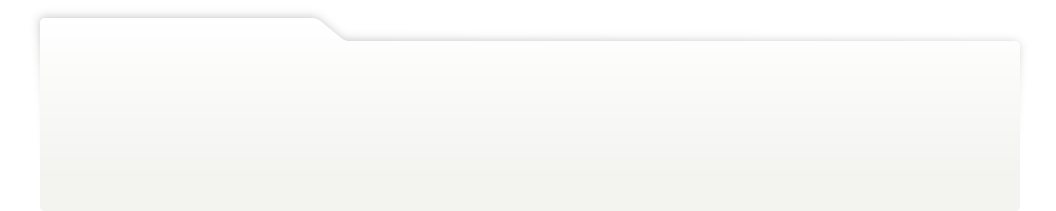
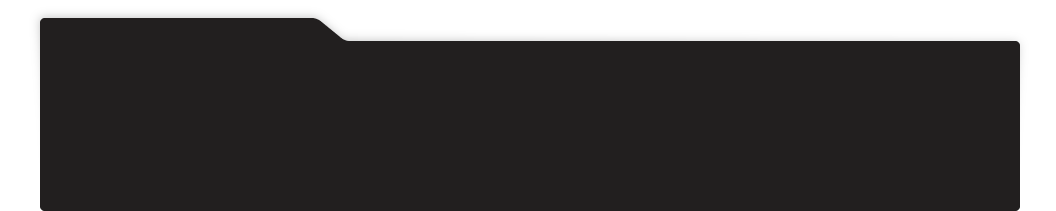
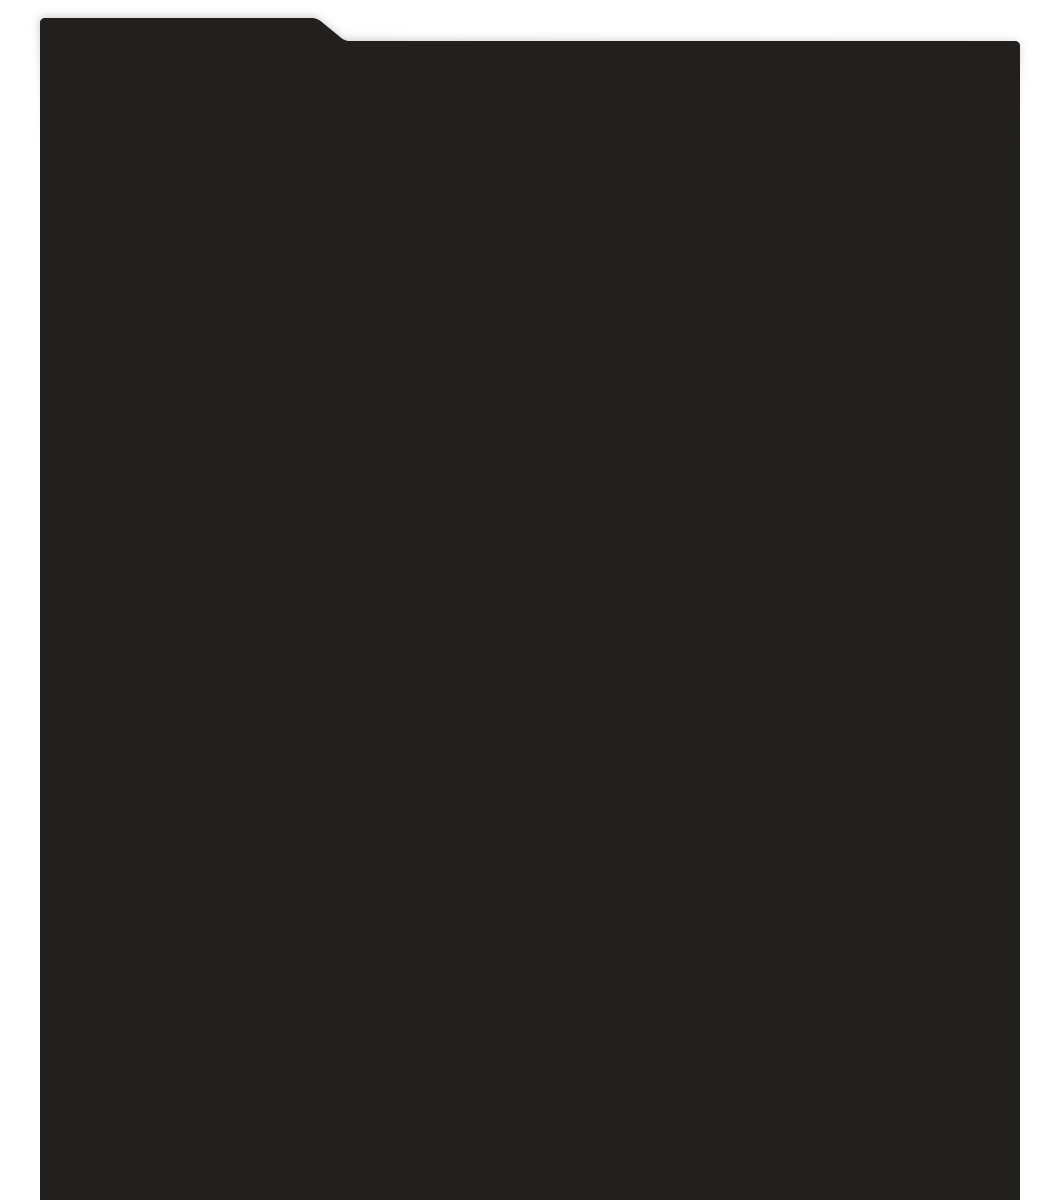
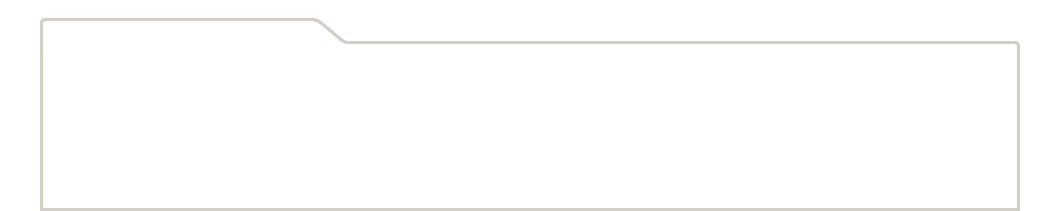
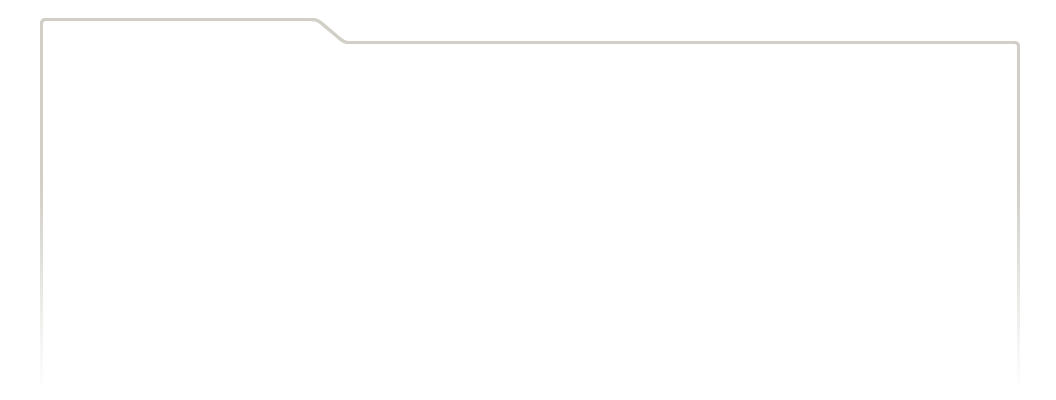
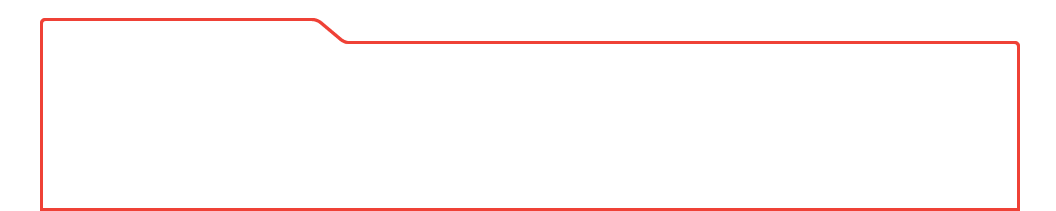
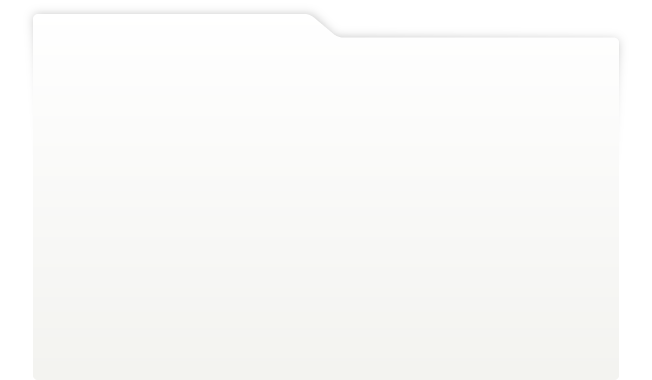
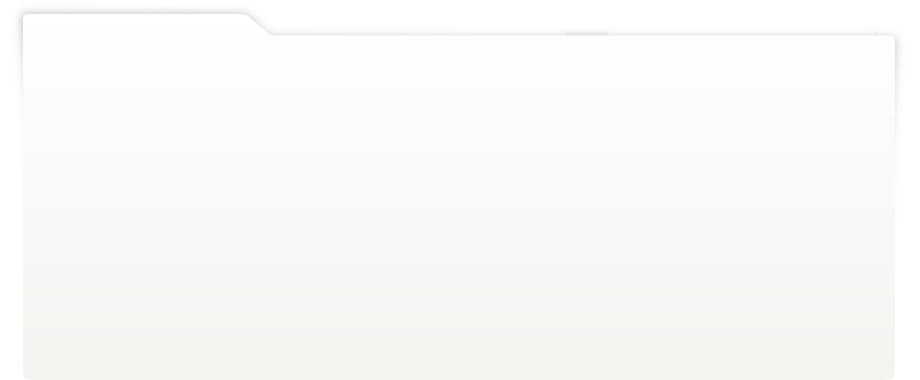
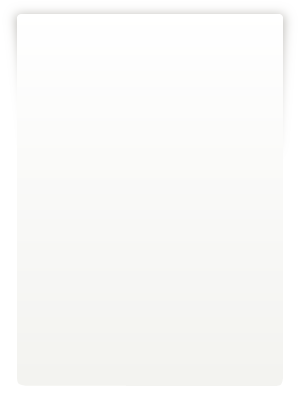
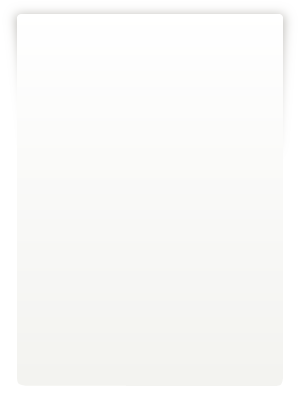
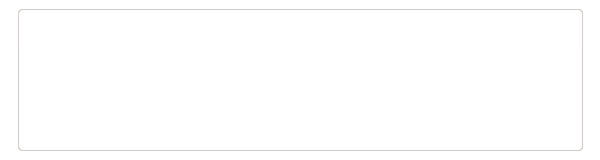
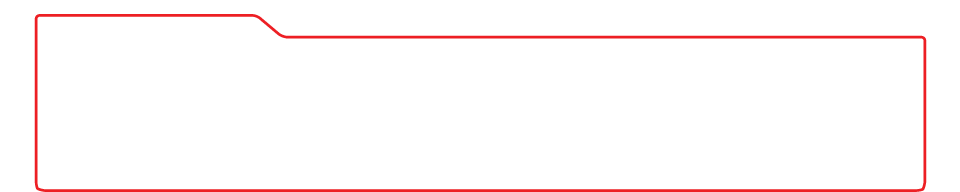
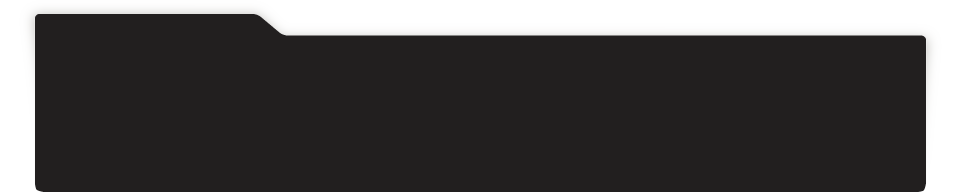
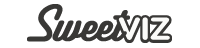
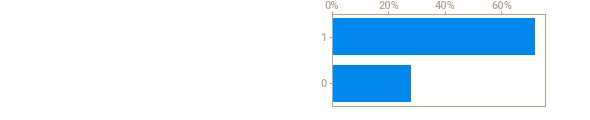
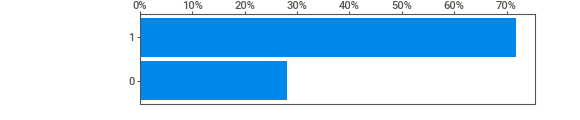
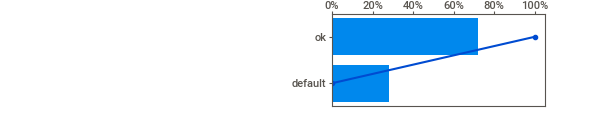
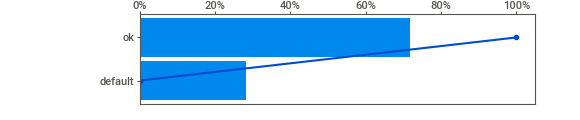
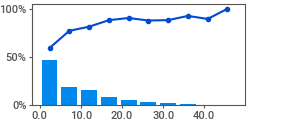
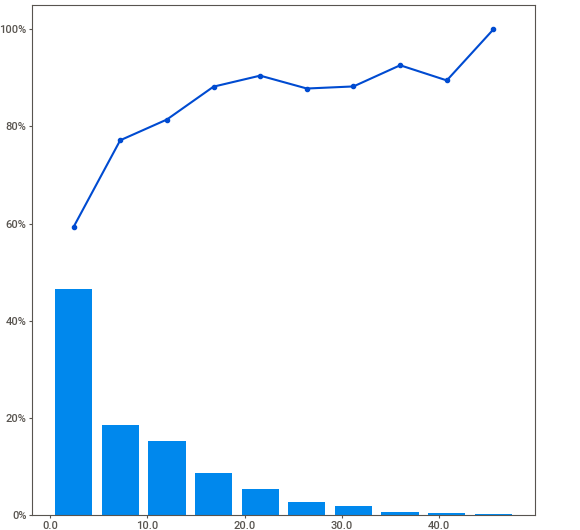
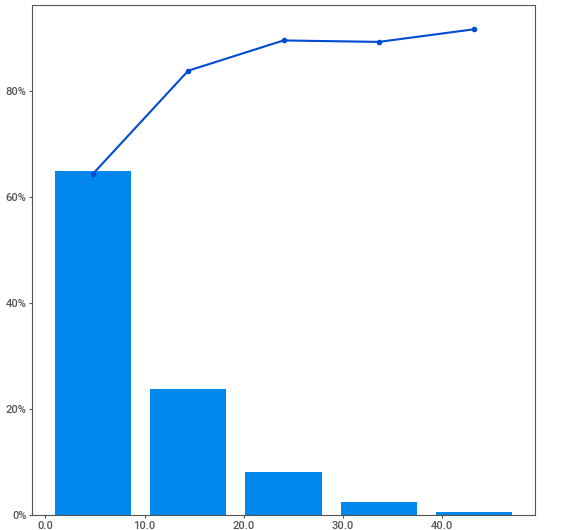
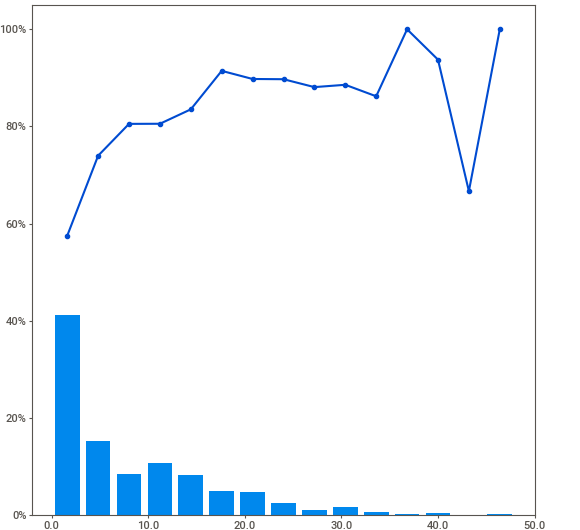
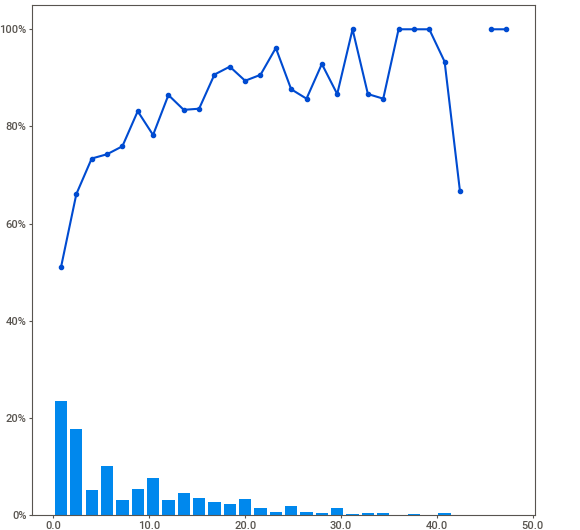
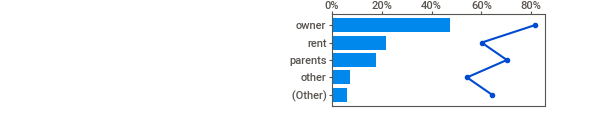
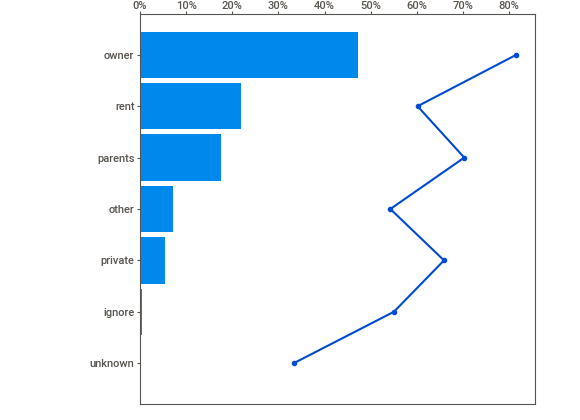
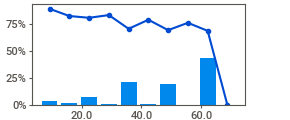
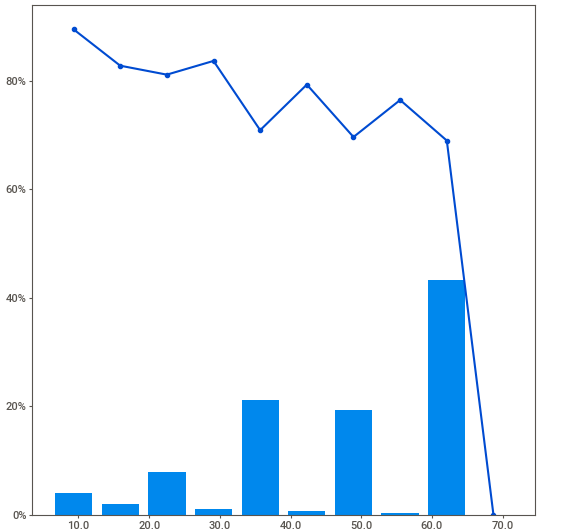
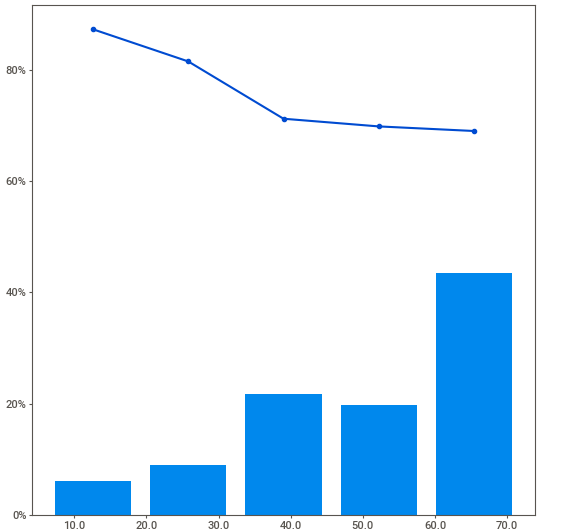
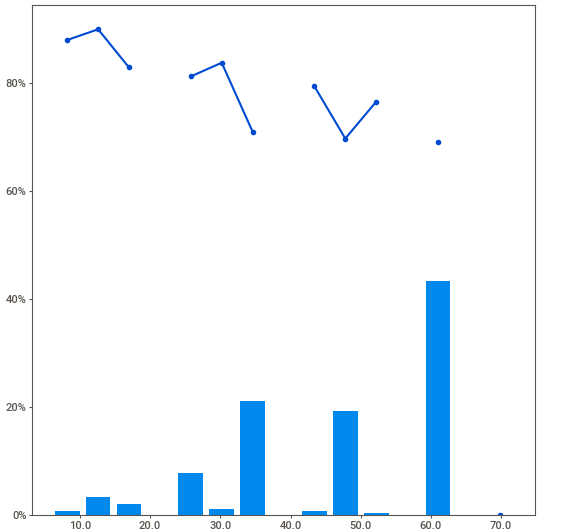
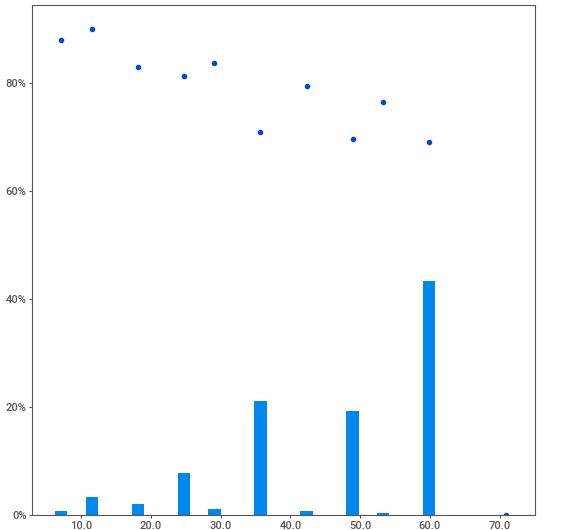
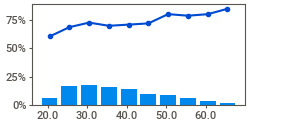
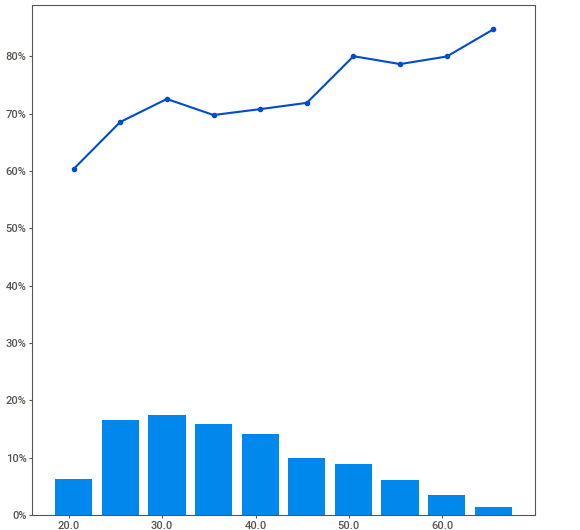
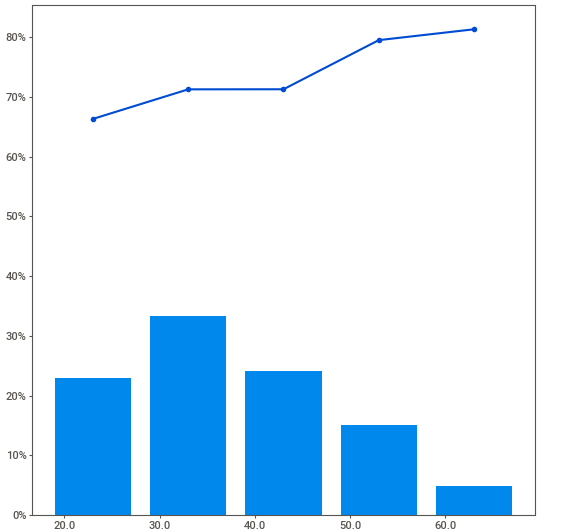
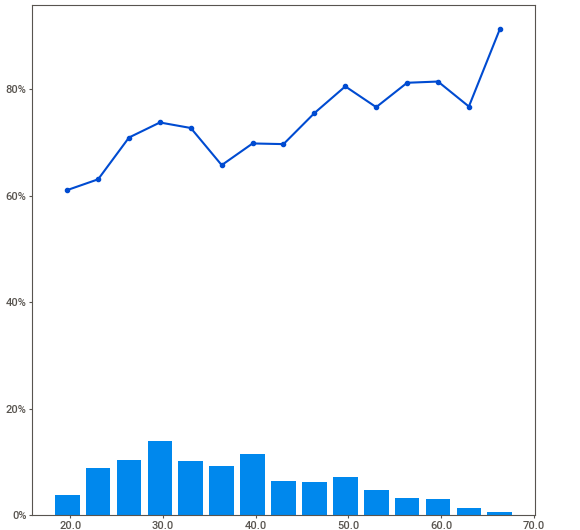
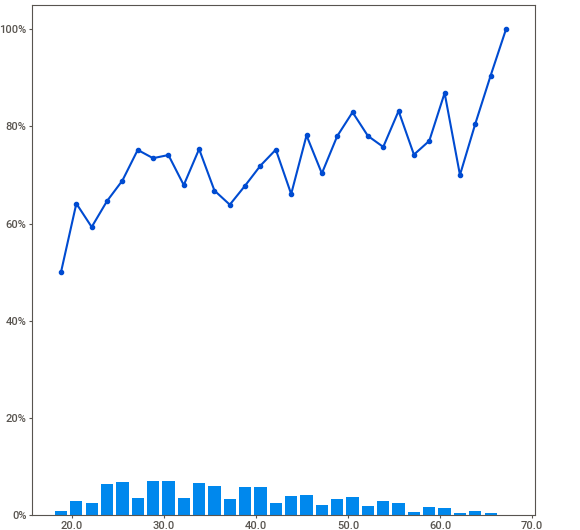
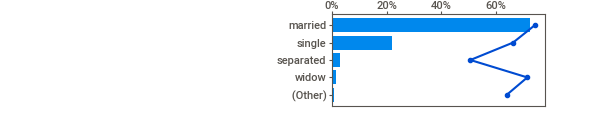
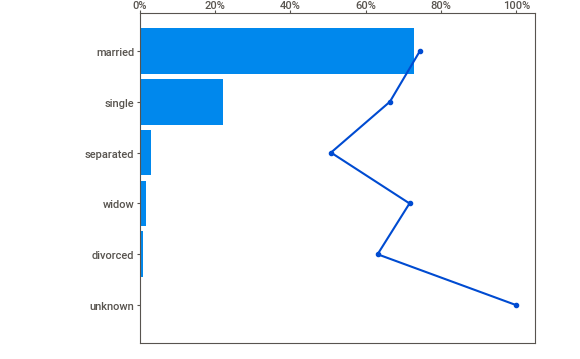
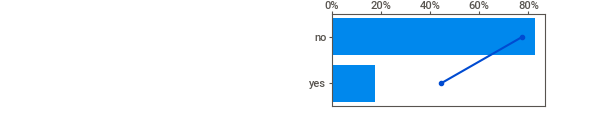
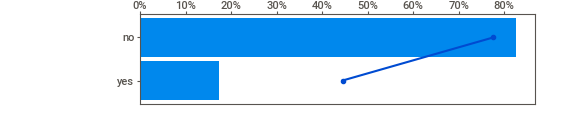
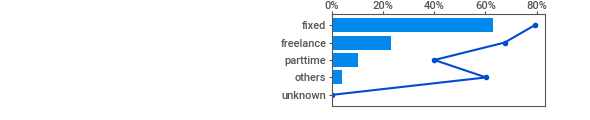
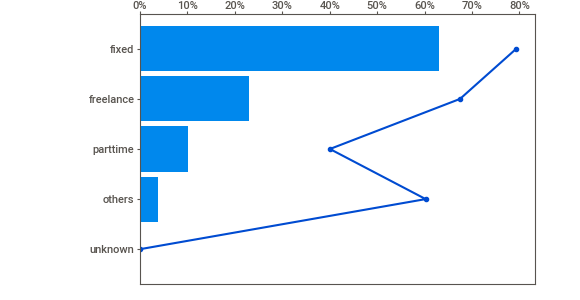
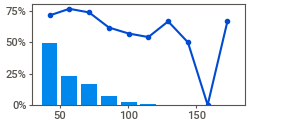
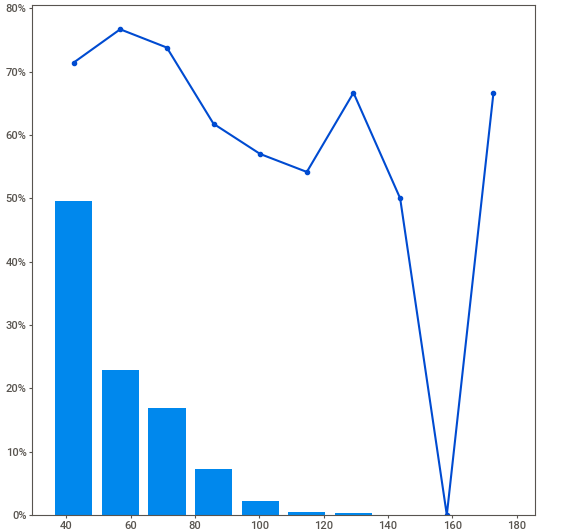
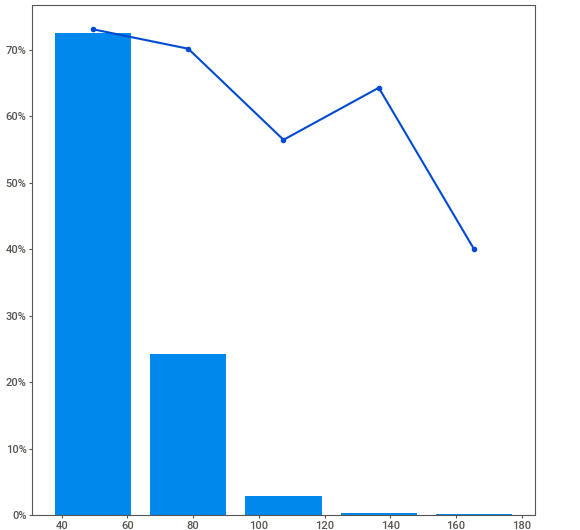
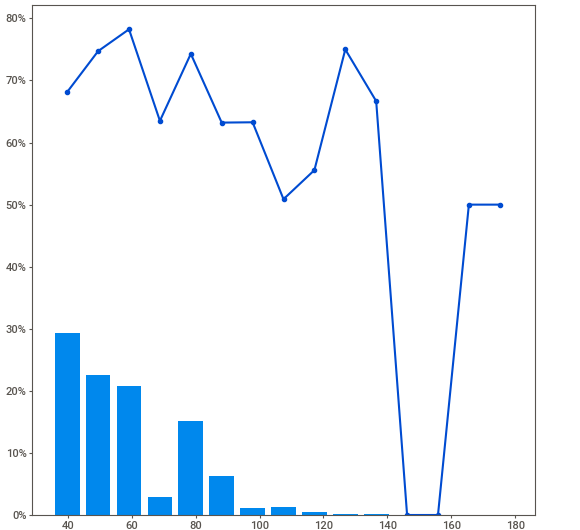
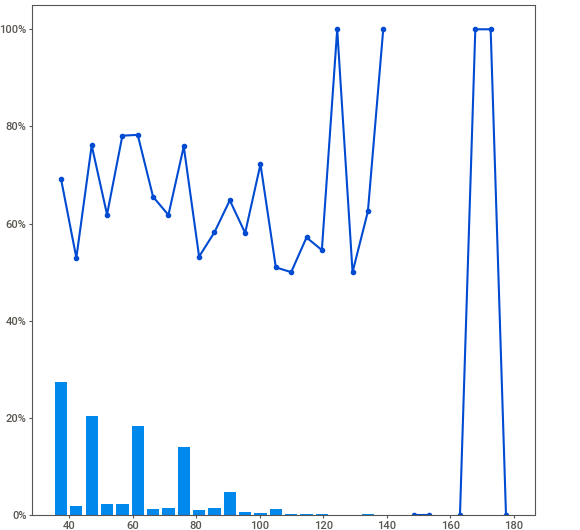
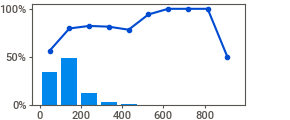
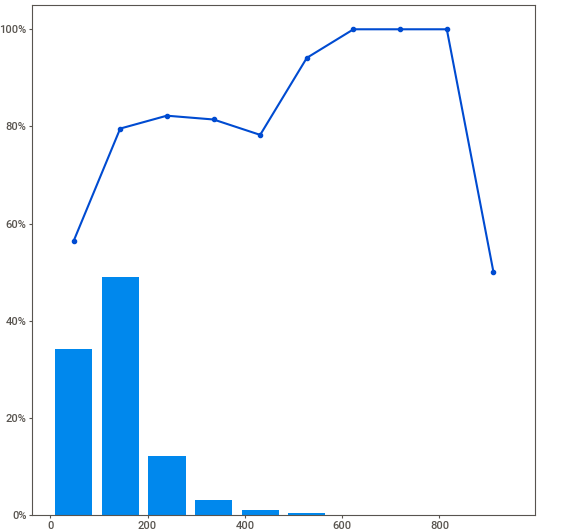
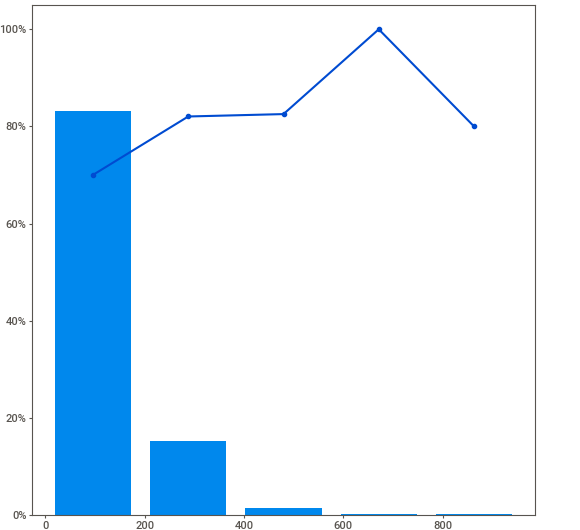
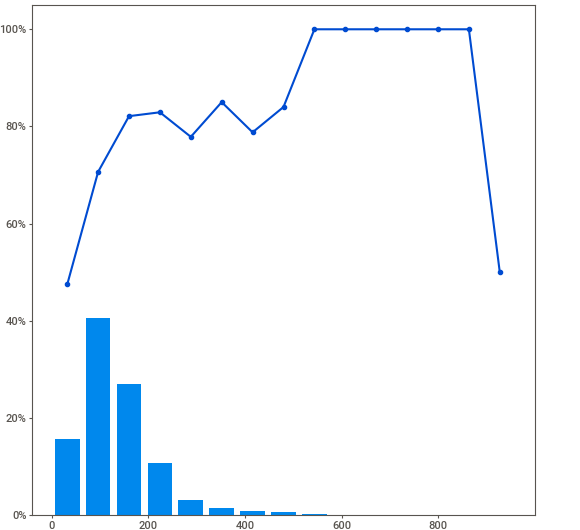
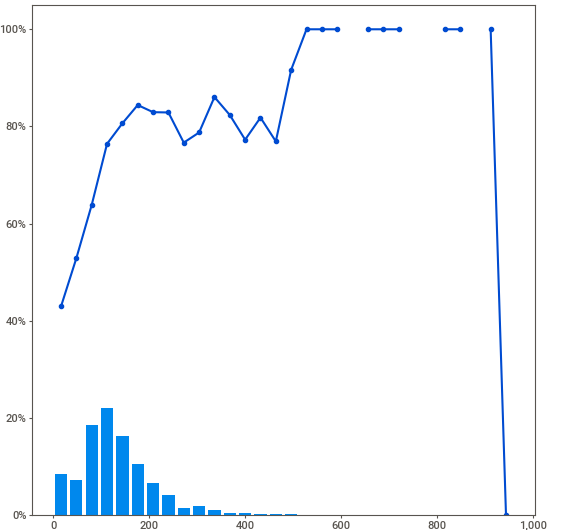
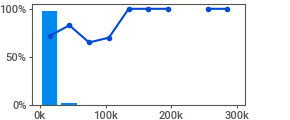
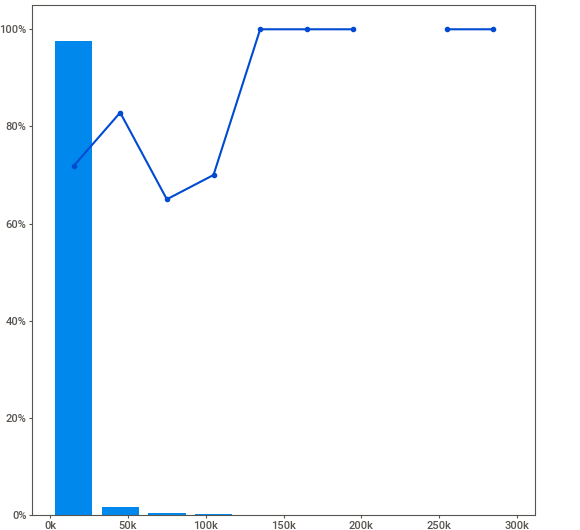
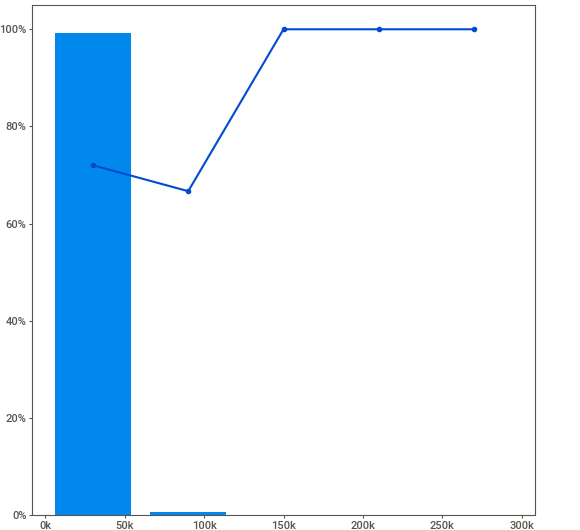
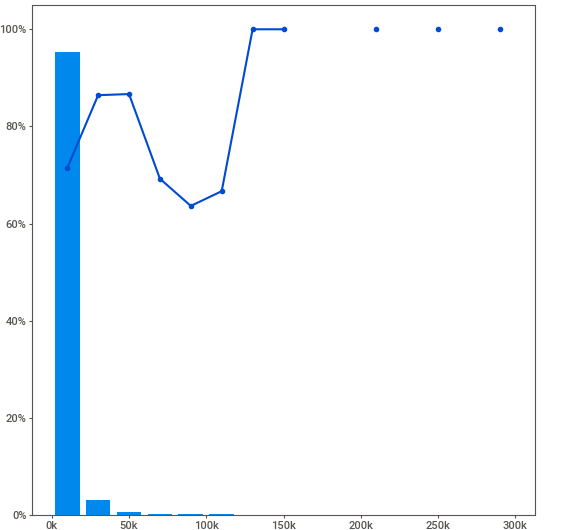
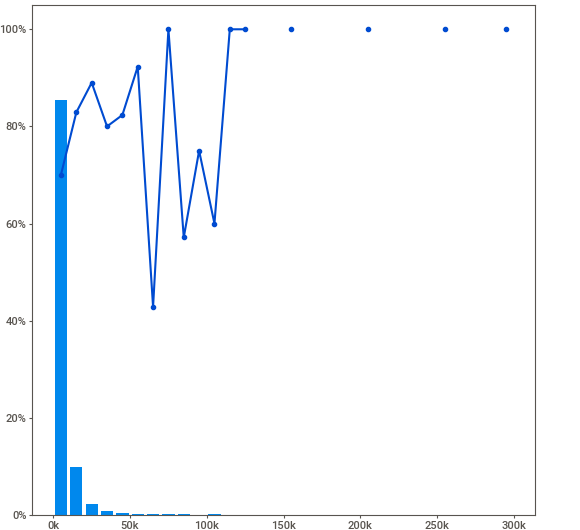
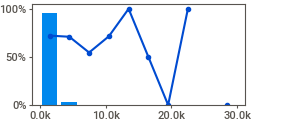
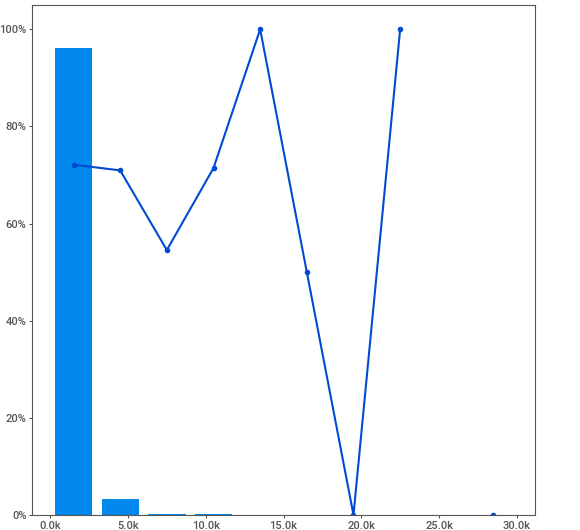
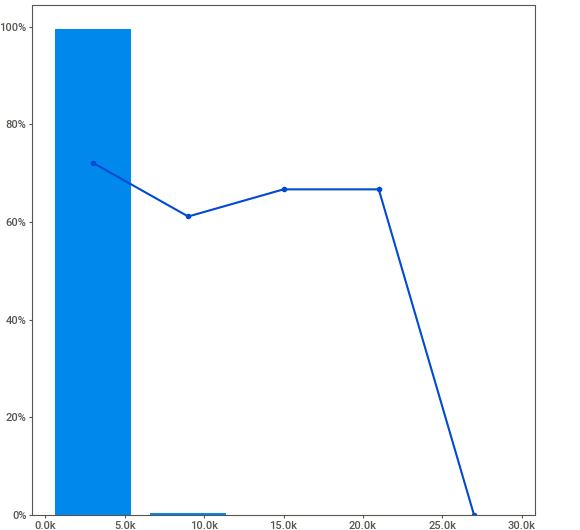
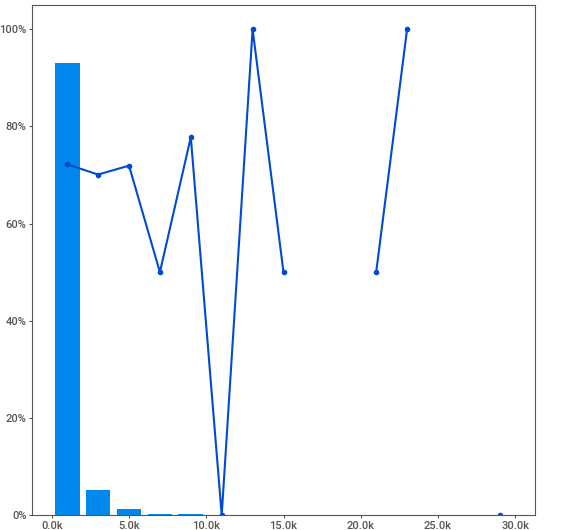
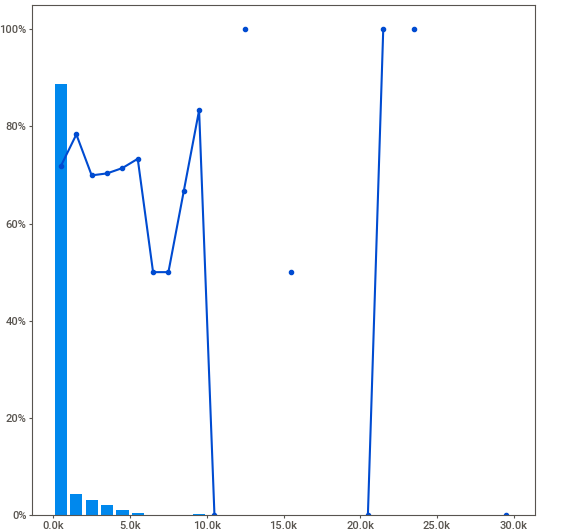
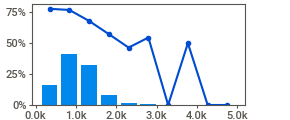
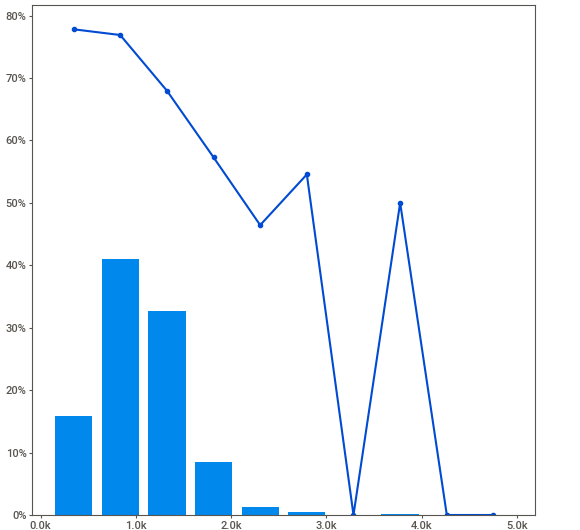
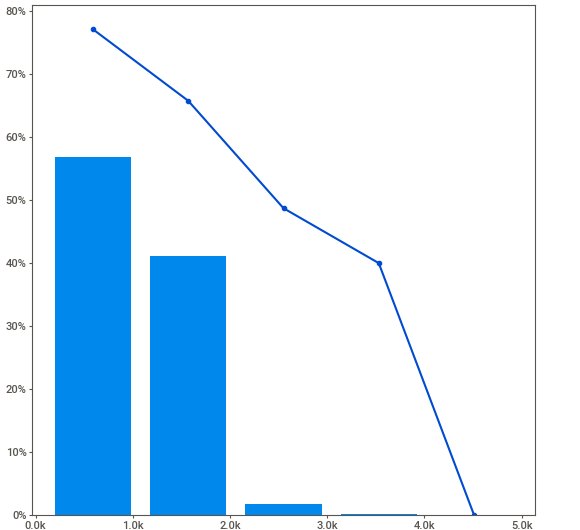
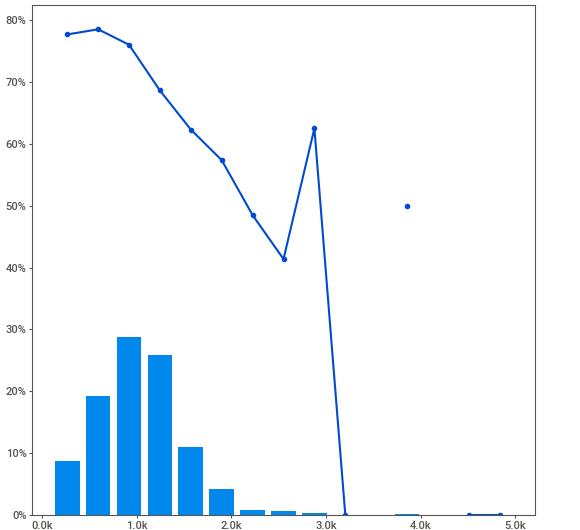
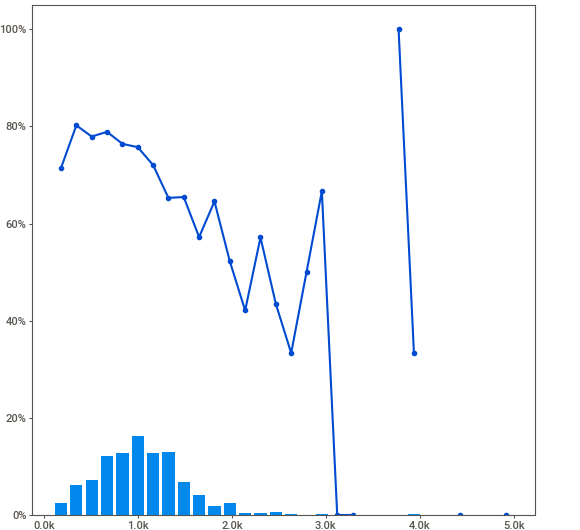
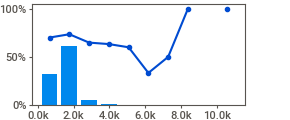
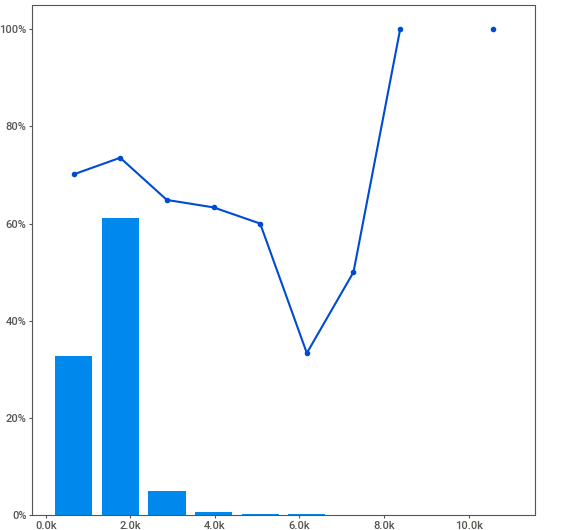
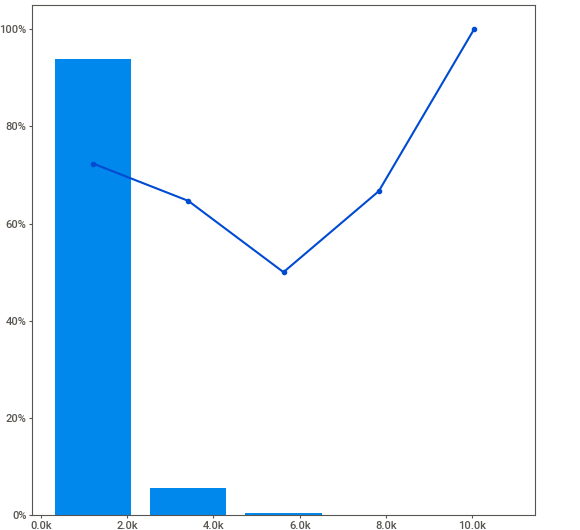
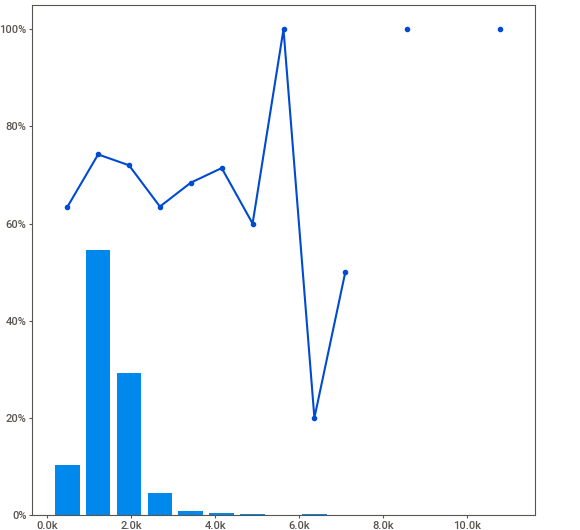
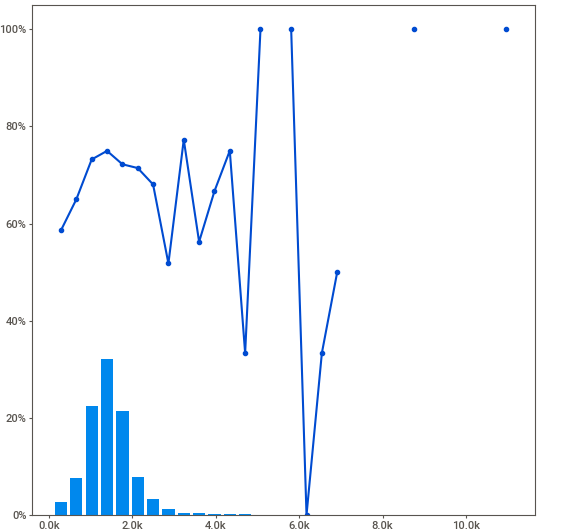
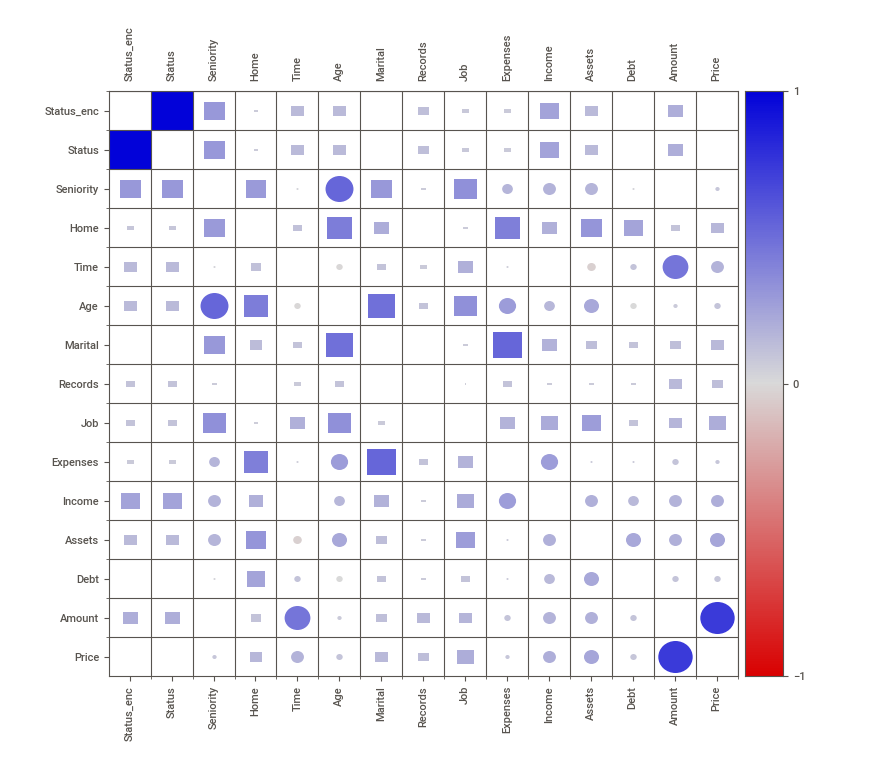
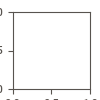

In [17]:
report.show_notebook()

In [18]:
# Remove encoded target
df = df.drop('Status_enc', axis = 1)

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis = 1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [20]:
X_train

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
734,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
981,6,owner,18,33,single,no,fixed,35,163.0,6000.0,0.0,1200,2022
452,2,rent,36,21,single,no,fixed,45,100.0,0.0,0.0,700,825
4120,10,owner,48,36,married,yes,freelance,75,214.0,10000.0,0.0,1143,1143
4218,10,private,36,47,married,yes,fixed,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0,rent,36,24,single,no,parttime,44,85.0,0.0,0.0,375,575
4061,5,rent,54,27,married,no,fixed,47,118.0,0.0,0.0,1500,1600
1346,3,owner,48,32,married,no,freelance,75,65.0,10500.0,1500.0,1500,2155
3455,1,private,60,28,married,no,parttime,60,174.0,6000.0,720.0,1650,1930


## Feature engineering

In [21]:
numeric_cols = X_train.describe().columns
X_train_num = X_train[numeric_cols]

In [22]:
X_train_num = X_train_num.fillna(0)
X_train_num = X_train_num.reset_index(drop = True)

In [23]:
X_train_num

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
0,30,18,57,75,290.0,0.0,0.0,350,450
1,6,18,33,35,163.0,6000.0,0.0,1200,2022
2,2,36,21,45,100.0,0.0,0.0,700,825
3,10,48,36,75,214.0,10000.0,0.0,1143,1143
4,10,36,47,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575
3559,5,54,27,47,118.0,0.0,0.0,1500,1600
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930


## Categorical features

In [24]:
categories = [list(home_enc.values()), 
              list(marital_enc.values()), 
              list(records_enc.values()), 
              list(job_enc.values())]

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories = categories)

X_train_categorical = X_train[['Home', 'Marital', 'Records', 'Job']]
X_train_categorical = onehot_encoder.fit_transform(X_train_categorical)

X_train_categorical = pd.DataFrame(X_train_categorical, columns=onehot_encoder.get_feature_names_out())
X_train_categorical

c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Home_unknown,Home_rent,Home_owner,Home_private,Home_ignore,Home_parents,Home_other,Marital_unknown,Marital_single,Marital_married,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
X_train_fe = pd.concat([X_train_num, X_train_categorical], axis = 1)

In [26]:
X_train_fe

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Home_unknown,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,30,18,57,75,290.0,0.0,0.0,350,450,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6,18,33,35,163.0,6000.0,0.0,1200,2022,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,36,21,45,100.0,0.0,0.0,700,825,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,48,36,75,214.0,10000.0,0.0,1143,1143,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,10,36,47,45,60.0,5000.0,0.0,250,1343,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,5,54,27,47,118.0,0.0,0.0,1500,1600,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree

### Training

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
y_train[y_train.isna()]

Series([], Name: Status, dtype: object)

In [29]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=10)

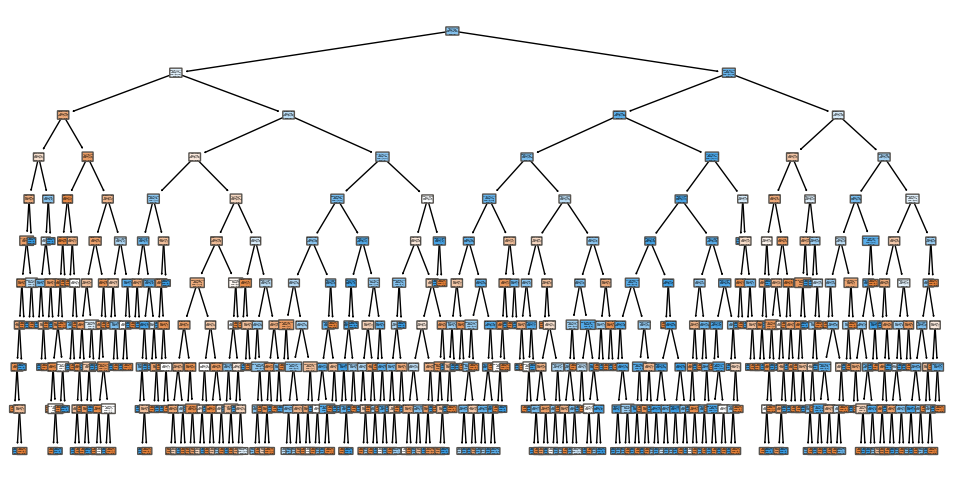

In [30]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(dt, feature_names = X_train_fe.columns.tolist(), 
          class_names = y_train.unique().tolist(),
          filled = True,
          rounded = True); 

In [31]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names = list(X_train_fe.columns))
print(tree_rules)

|--- Seniority <= 2.50
|   |--- Records_no <= 0.50
|   |   |--- Amount <= 925.00
|   |   |   |--- Price <= 1062.00
|   |   |   |   |--- Debt <= 525.00
|   |   |   |   |   |--- Job_freelance <= 0.50
|   |   |   |   |   |   |--- Price <= 537.50
|   |   |   |   |   |   |   |--- Price <= 512.50
|   |   |   |   |   |   |   |   |--- Expenses <= 87.00
|   |   |   |   |   |   |   |   |   |--- class: default
|   |   |   |   |   |   |   |   |--- Expenses >  87.00
|   |   |   |   |   |   |   |   |   |--- Amount <= 325.00
|   |   |   |   |   |   |   |   |   |   |--- class: ok
|   |   |   |   |   |   |   |   |   |--- Amount >  325.00
|   |   |   |   |   |   |   |   |   |   |--- class: default
|   |   |   |   |   |   |   |--- Price >  512.50
|   |   |   |   |   |   |   |   |--- class: ok
|   |   |   |   |   |   |--- Price >  537.50
|   |   |   |   |   |   |   |--- class: default
|   |   |   |   |   |--- Job_freelance >  0.50
|   |   |   |   |   |   |--- Home_rent <= 0.50
|   |   |   |   |   |   |   

### Evaluation

Score on training data

In [34]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_train_fe)
accuracy_score(y_train, y_pred)

0.9160819534100477

Score on testing data

In [35]:
# Feature Engineering Pipeline

# Numerical Features
X_test_num = X_test[X_test.describe().columns]
X_test_num = X_test_num.fillna(0).reset_index(drop = True)

# Categorical Features
onehot_encoder = OneHotEncoder(sparse=False, categories = categories)

X_test_categorical = X_test[['Home', 'Marital', 'Records', 'Job']]
X_test_categorical = onehot_encoder.fit_transform(X_test_categorical)

X_test_categorical = pd.DataFrame(X_test_categorical, columns=onehot_encoder.get_feature_names_out())

# Concat num + cat features
X_test_fe = pd.concat([X_test_num, X_test_categorical], axis = 1)

c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
y_pred = dt.predict(X_test_fe)
accuracy_score(y_test, y_pred)

0.7609427609427609

## Adaptive Boosting

### Training

Random Forest with Scikit-learn

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
rf = AdaBoostClassifier(n_estimators = 100)
rf.fit(X_train_fe, y_train)

AdaBoostClassifier(n_estimators=100)

Inspect trees

In [39]:
rf.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=823874082),
 DecisionTreeClassifier(max_depth=1, random_state=1154300413),
 DecisionTreeClassifier(max_depth=1, random_state=177176363),
 DecisionTreeClassifier(max_depth=1, random_state=787477544),
 DecisionTreeClassifier(max_depth=1, random_state=627516290),
 DecisionTreeClassifier(max_depth=1, random_state=1175794211),
 DecisionTreeClassifier(max_depth=1, random_state=356006578),
 DecisionTreeClassifier(max_depth=1, random_state=587987629),
 DecisionTreeClassifier(max_depth=1, random_state=920227062),
 DecisionTreeClassifier(max_depth=1, random_state=268574487),
 DecisionTreeClassifier(max_depth=1, random_state=404638304),
 DecisionTreeClassifier(max_depth=1, random_state=13710795),
 DecisionTreeClassifier(max_depth=1, random_state=1488620826),
 DecisionTreeClassifier(max_depth=1, random_state=1737733200),
 DecisionTreeClassifier(max_depth=1, random_state=334245122),
 DecisionTreeClassifier(max_depth=1, random_state=528997164),
 Deci

Grid search

In [40]:
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier()

# Define grid
parameters = {'n_estimators': [10, 20, 50, 100]}

k = 5
grid_search = GridSearchCV(model, parameters, cv = k, scoring = "roc_auc")
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 20, 50, 100]}, scoring='roc_auc')

In [41]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.301453,0.028639,0.019359,0.003126,50,{'n_estimators': 50},0.856518,0.866823,0.818060,0.817754,0.800190,0.831869,0.025388,1
1,0.112388,0.002948,0.009139,0.000510,20,{'n_estimators': 20},0.841899,0.869189,0.821160,0.816128,0.805918,0.830859,0.022469,2
3,0.609968,0.019413,0.033208,0.004557,100,{'n_estimators': 100},0.852967,0.864821,0.812529,0.815474,0.790562,0.827270,0.027475,3
0,0.061915,0.004568,0.006984,0.000695,10,{'n_estimators': 10},0.826740,0.841884,0.807583,0.799653,0.787559,0.812684,0.019377,4


Retrain on full data set

In [44]:
# Retrain on full dataset
rf = grid_search.best_estimator_
rf.fit(X_train_fe, y_train)

AdaBoostClassifier()

### Evaluation

Test set performance

In [45]:
y_pred = rf.predict(X_test_fe)
accuracy_score(y_test, y_pred)

0.7991021324354658

### Feature Importance

#### PDP - Partial Dependence Plots

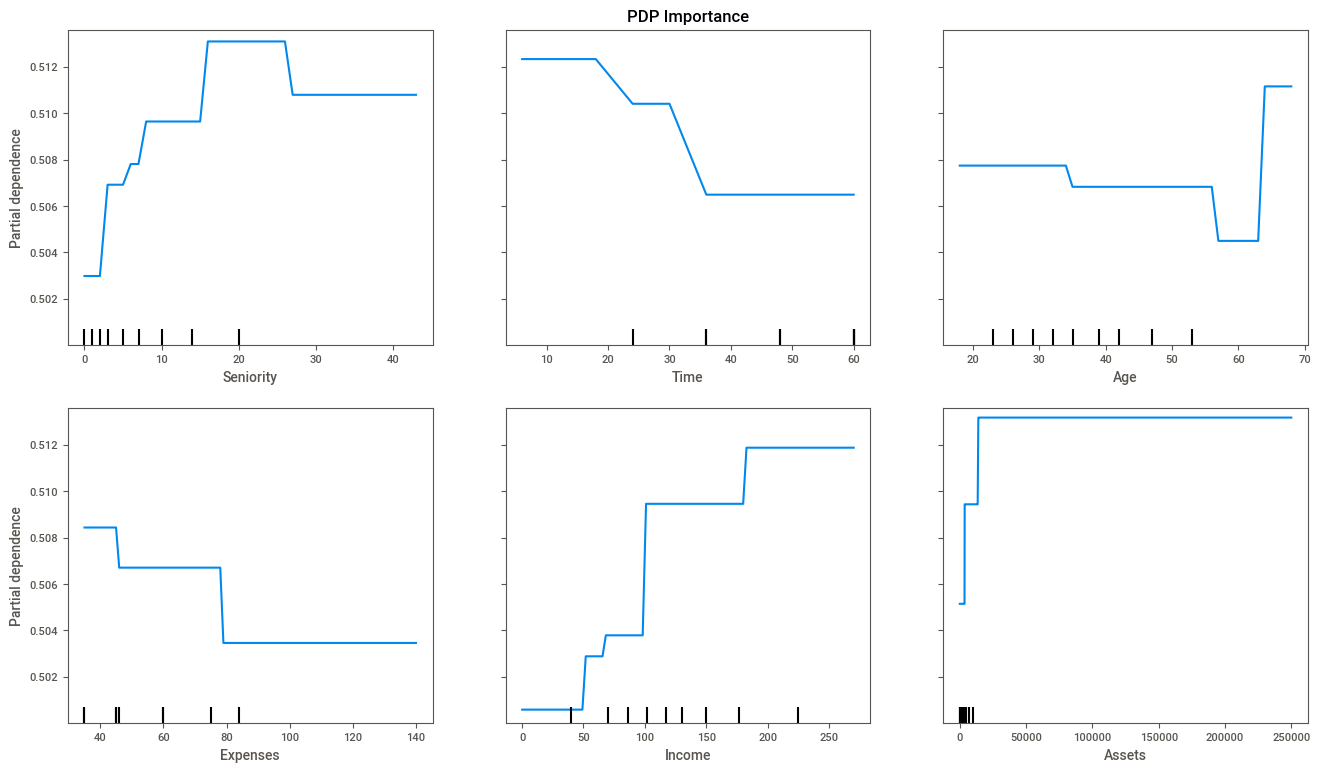

In [46]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[:6]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

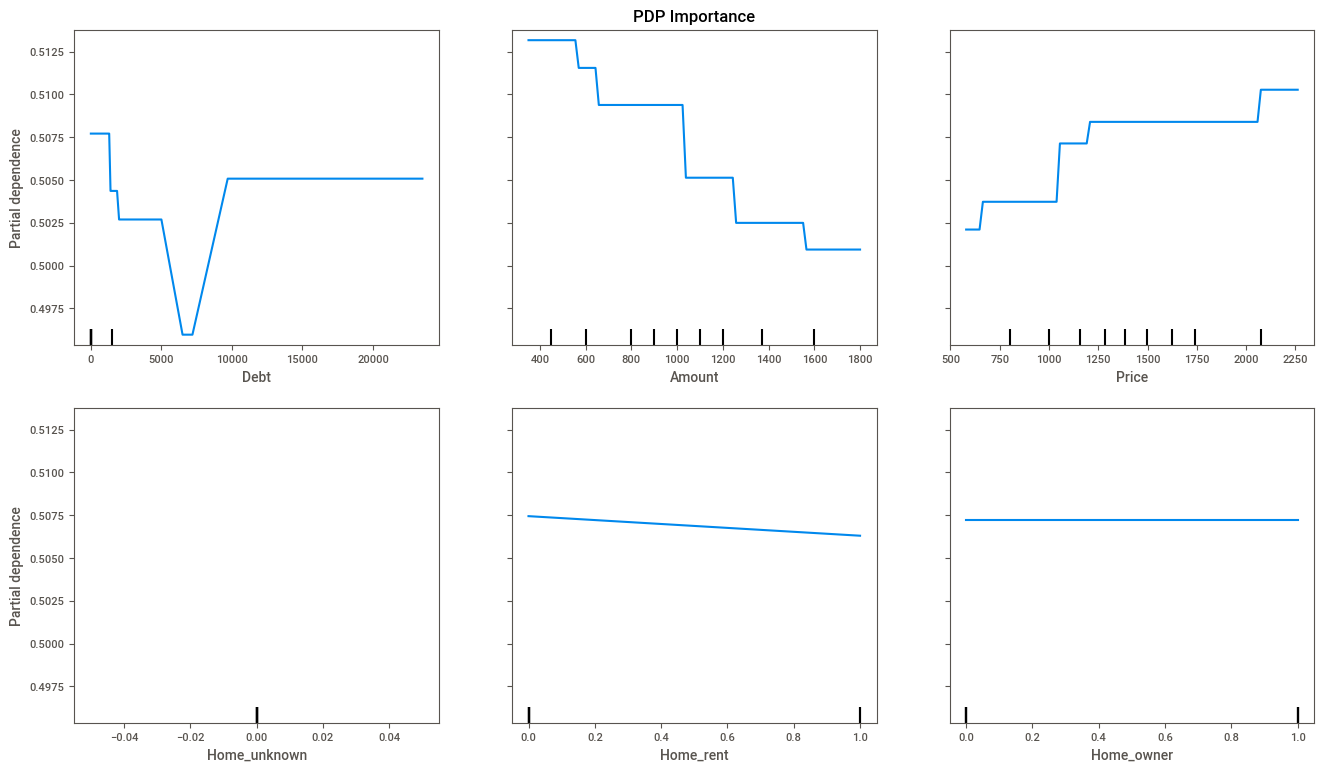

In [47]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[6:12]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

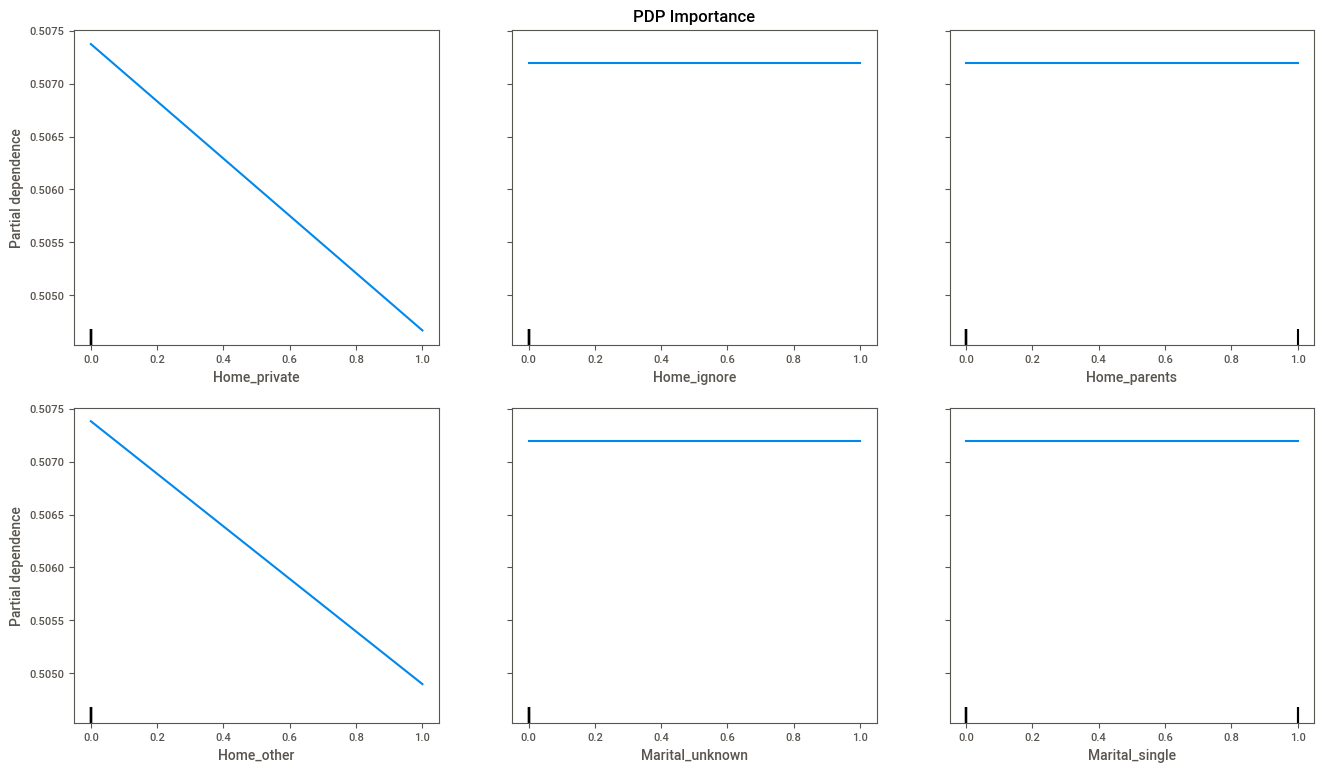

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[12:18]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

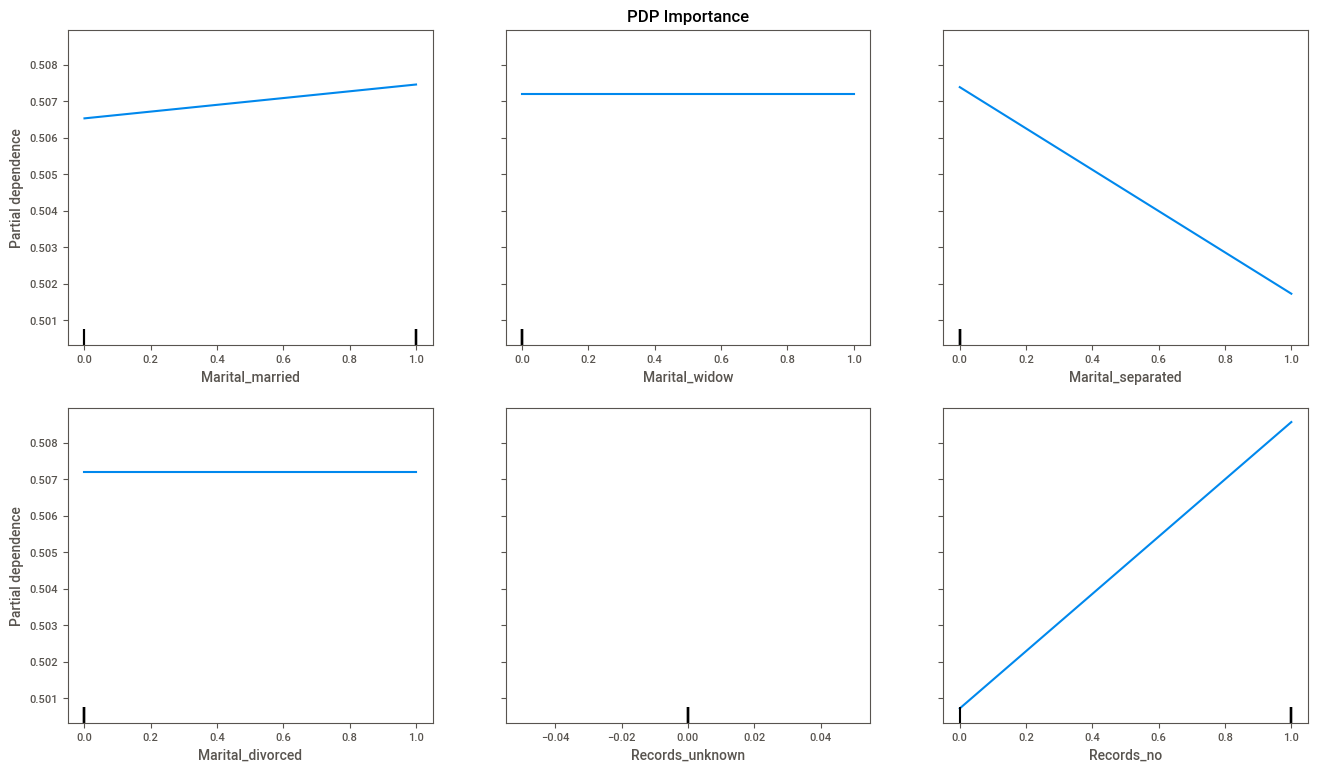

In [49]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[18:24]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

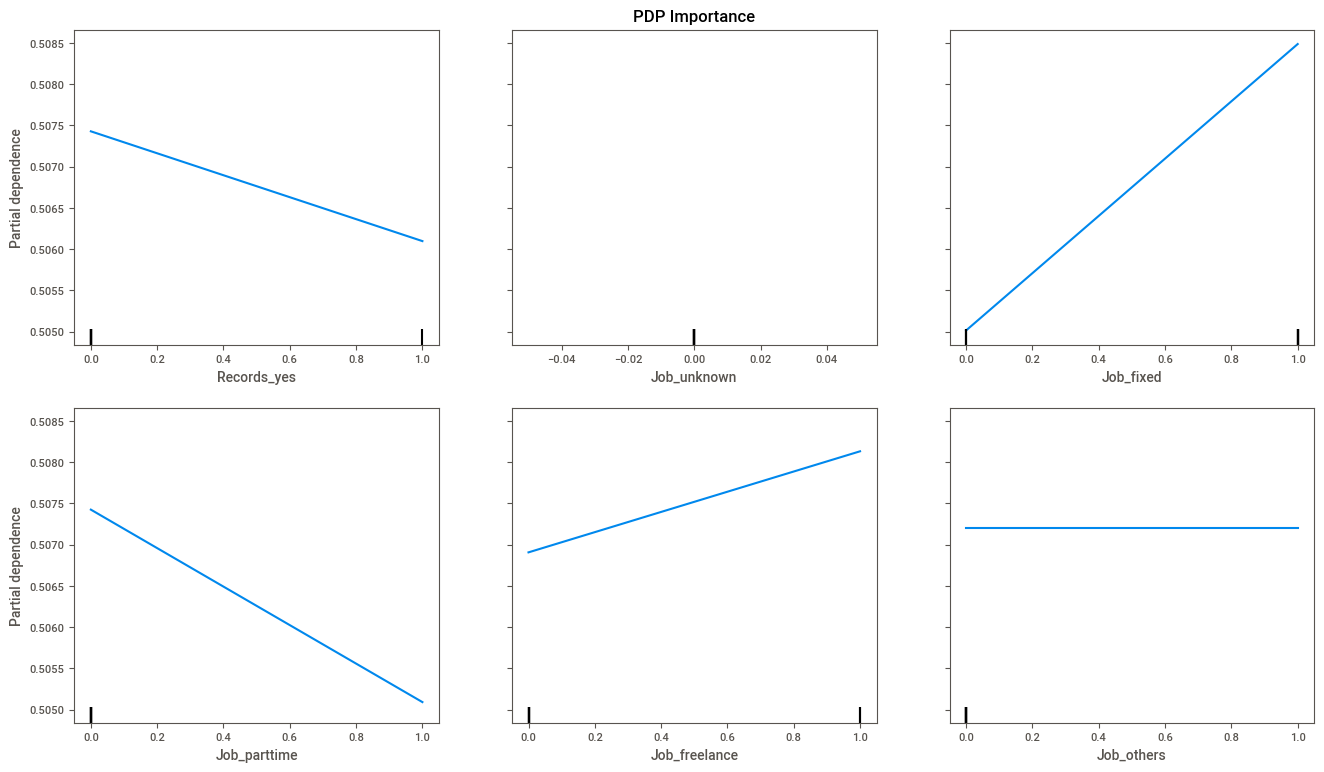

In [50]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[24:30]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

### Permutation Feature Importance

In [51]:
from sklearn.inspection import permutation_importance

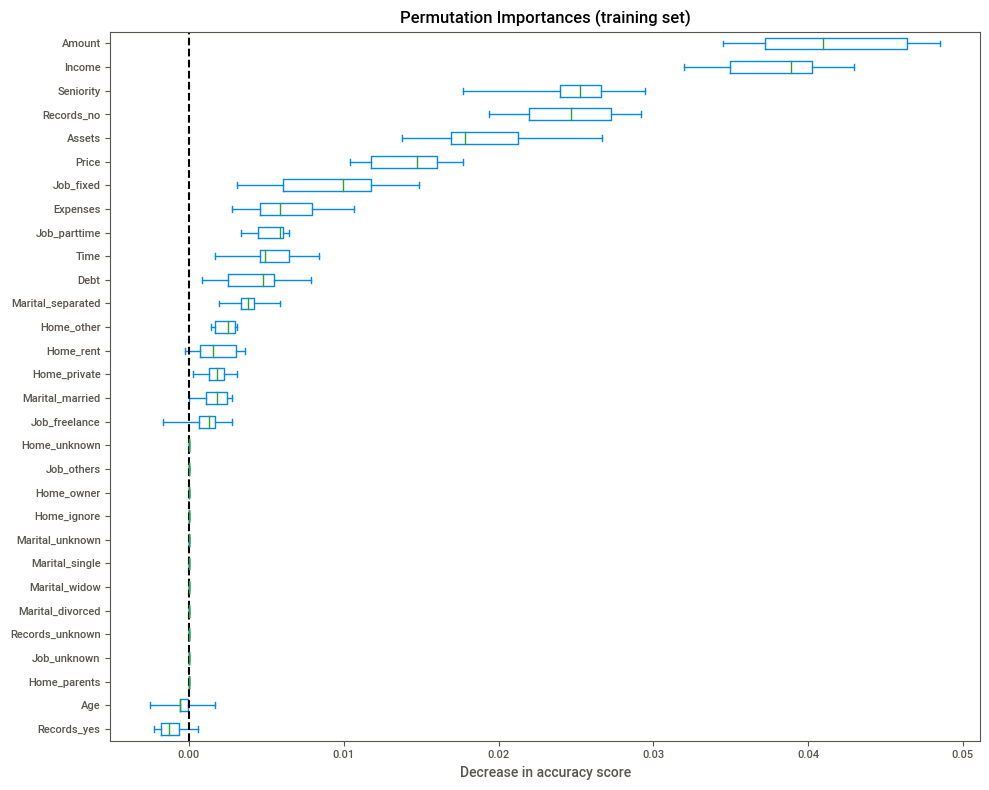

In [52]:
result = permutation_importance(rf, X_train_fe, y_train, n_repeats=10, random_state=123)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train_fe.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importances (training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()